# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"  # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"  # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]  # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]  # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"]  # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"]  # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"]  # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"]  # YOUR CODE HERE
        city_country = city_weather["sys"]["country"]  # YOUR CODE HERE
        city_date = city_weather["dt"]   # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carinhanha
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | filingue
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | omboue
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | port-gentil
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | san cristobal
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | kiama
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | hithadhoo
Processing Record

Processing Record 36 of Set 4 | amderma
City not found. Skipping...
Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | porto santo
Processing Record 39 of Set 4 | veriora
Processing Record 40 of Set 4 | samatau
City not found. Skipping...
Processing Record 41 of Set 4 | portobelo
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | lompoc
Processing Record 44 of Set 4 | sovetskiy
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | shar
Processing Record 47 of Set 4 | wanning
Processing Record 48 of Set 4 | adrar
Processing Record 49 of Set 4 | kirya
Processing Record 0 of Set 5 | longyearbyen
Processing Record 1 of Set 5 | mizdah
Processing Record 2 of Set 5 | skelleftea
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | khakhea
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | narsaq
Processing Record 7 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 5 | mudgee


Processing Record 25 of Set 8 | watsa
Processing Record 26 of Set 8 | port ellen
City not found. Skipping...
Processing Record 27 of Set 8 | dali
Processing Record 28 of Set 8 | normandin
Processing Record 29 of Set 8 | guerrero negro
Processing Record 30 of Set 8 | distraccion
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | zlobin
Processing Record 33 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 8 | kongoussi
Processing Record 35 of Set 8 | igarka
Processing Record 36 of Set 8 | roald
Processing Record 37 of Set 8 | dunda
Processing Record 38 of Set 8 | rio gallegos
Processing Record 39 of Set 8 | akyab
Processing Record 40 of Set 8 | hohhot
Processing Record 41 of Set 8 | kalangala
Processing Record 42 of Set 8 | itarema
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | baruun-urt
Processing Record 45 of Set 8 | comodoro rivadavia
Processing Record 46 of Set 8 | pinehurst
Processing Record 47 o

Processing Record 18 of Set 12 | sorvag
City not found. Skipping...
Processing Record 19 of Set 12 | gopalpur
Processing Record 20 of Set 12 | eirunepe
Processing Record 21 of Set 12 | grafton
Processing Record 22 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 23 of Set 12 | rosetta
Processing Record 24 of Set 12 | zeya
Processing Record 25 of Set 12 | faranah
Processing Record 26 of Set 12 | eureka
Processing Record 27 of Set 12 | buala
Processing Record 28 of Set 12 | scarborough
Processing Record 29 of Set 12 | lavrentiya
Processing Record 30 of Set 12 | odweyne
Processing Record 31 of Set 12 | poya
Processing Record 32 of Set 12 | catamarca
Processing Record 33 of Set 12 | don sak
Processing Record 34 of Set 12 | gambo
Processing Record 35 of Set 12 | marquette
Processing Record 36 of Set 12 | jalingo
Processing Record 37 of Set 12 | aleksandrov gay
Processing Record 38 of Set 12 | khandyga
Processing Record 39 of Set 12 | guiratinga
Processing Record 40 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carinhanha,-14.3047,-43.7650,26.72,44,99,1.84,BR,1680920290
1,kruisfontein,-34.0033,24.7314,16.05,87,100,2.95,ZA,1680920291
2,filingue,14.3521,3.3168,29.32,17,65,4.72,NE,1680920292
3,airai,-8.9266,125.4092,19.83,69,100,1.72,TL,1680920292
4,castro,-24.7911,-50.0119,15.50,98,100,2.80,BR,1680920293


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

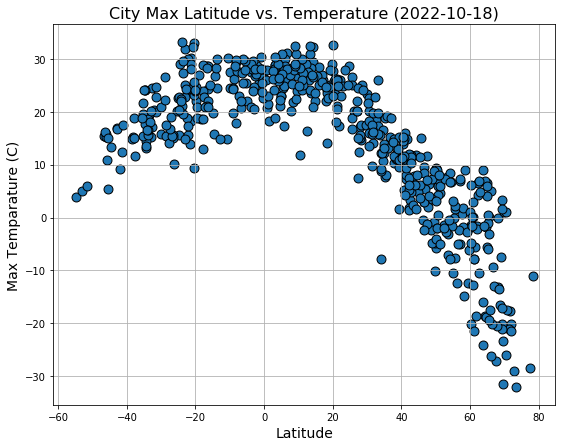

In [33]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Max Temp"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Max Temparature (C)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

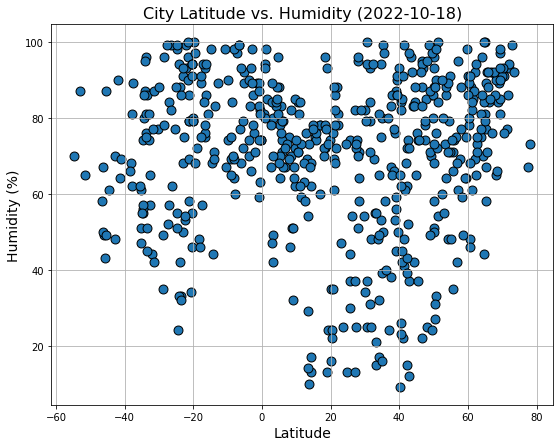

In [36]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Humidity"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Humidity (%)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

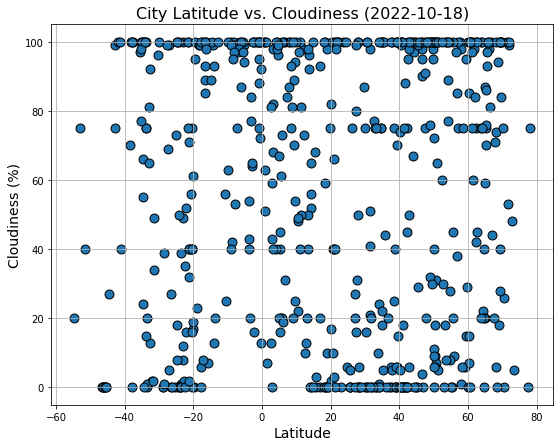

In [37]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Cloudiness"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Cloudiness (%)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

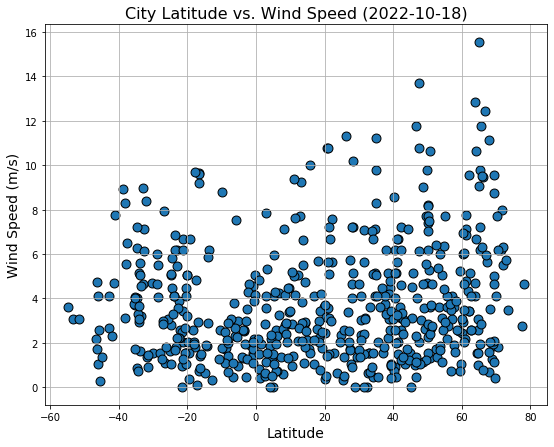

In [38]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.figure(figsize=(9,7))
plt.scatter(x=city_data_df["Lat"], y=city_data_df["Wind Speed"], s=80, edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)",fontdict={"size":16})
plt.xlabel("Latitude", fontdict={"size":14})
plt.ylabel("Wind Speed (m/s)", fontdict={"size":14})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE